# Analytique de l'apprentissage

## Extraction de relations, corrélations et de motifs


Carnet web IPython (Jupyter Notebook) en complément du **«Chapitre 6 – Vers une IENA pilotée par les données » ** du livre : **« Vers une nouvelle ingénierie des environnements numériques d’apprentissage »**, auteurs du chapitre, Claude Coulombe & Valéry Psyché, éditeurs: Josiane Basque, Gilbert Paquette, licence code source libre MIT

### Relation entre l'organisation du temps vs les notes et la certification

Nous allons étudier la corrélation entre l’organisation du temps d’étude, les notes obtenues et la réussite du cours par l'obtention d'une attestation.

L’analytique d’apprentissage consiste souvent en la vérification d’hypothèses. Par exemple, dans Ulibre, nous avons cherché à savoir s’il y avait une relation (une corrélation) entre l’organisation du temps d’étude et l’obtention de la certification (i.e. la complétion du cours).

Le coefficient de corrélation linéaire, noté r, quantifie la force du lien linéaire entre les deux attributs d’une distribution.

In [2]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
path_to_datafile = "AA_data/"

In [4]:
DF_id_notes_attestation = pd.read_csv(path_to_datafile+"CTF_id_notes_attestation.csv", 
                                      na_values=[""], 
                                      index_col=False)
DF_id_notes_attestation.head()

,student_id,grade,attestation
0,5,0,notpassing
1,6,0,notpassing
2,8,0,notpassing
3,13,8,notpassing
4,33,0,notpassing


In [5]:
DF_id_notes_attestation.rename(columns={'student_id':'etudiant_id','grade':'note'}, inplace=True)
DF_id_notes_attestation.head()

,etudiant_id,note,attestation
0,5,0,notpassing
1,6,0,notpassing
2,8,0,notpassing
3,13,8,notpassing
4,33,0,notpassing


In [6]:
DF_id_notes_attestation.groupby('attestation').size()

attestation
generating     427
notpassing    1916
dtype: int64

In [7]:
DF_id_notes_attestation['attestation'] = DF_id_notes_attestation['attestation'].replace({'generating': 1, 'notpassing': 0})
DF_id_notes_attestation.head()

,etudiant_id,note,attestation
0,5,0,0
1,6,0,0
2,8,0,0
3,13,8,0
4,33,0,0


In [8]:
DF_id_horaire = pd.read_csv(path_to_datafile+"CTF_final_Q11_rep.csv", 
                            na_values=["***",None],
                            usecols=['student_id','time_organization'],
                            index_col=False)
pd.options.display.max_colwidth = 1000
DF_id_horaire.head()

,student_id,time_organization
0,13,NaN
1,369,NaN
2,4672,A des moments tres variables*Surtout durant la semaine - peu la fin de semaine*A egalite : le jour et en soiree*Jamais
3,5554,NaN
4,5611,A des moments tres variables*Surtout durant la semaine - peu la fin de semaine*A egalite : le jour et en soiree*Parfois


In [9]:
DF_id_horaire.rename(columns={'student_id':"etudiant_id",'time_organization':"horaire"}, inplace=True)

In [10]:
DF_id_horaire.dropna(subset=['horaire'], inplace = True)
DF_id_horaire.head()

,etudiant_id,horaire
2,4672,A des moments tres variables*Surtout durant la semaine - peu la fin de semaine*A egalite : le jour et en soiree*Jamais
4,5611,A des moments tres variables*Surtout durant la semaine - peu la fin de semaine*A egalite : le jour et en soiree*Parfois
5,4462,A des moments tres variables*En semaine ou la fin de semaine a egalite*Surtout le jour : entre 8h00 et 18h00.*Parfois
7,608,Plage de temps reservee avec quelques exceptions*En semaine ou la fin de semaine a egalite*A egalite : le jour et en soiree*Jamais
8,4344,A des moments tres variables*Surtout durant la semaine - peu la fin de semaine*Surtout en soiree : apres 18h00.*Parfois


In [11]:
DF_id_horaire['horaire'] = DF_id_horaire['horaire'].apply(lambda horaire: (horaire.split('*')[0]))

In [12]:
DF_id_horaire.groupby('horaire').size()

horaire
                                                    241
A des moments tres variables                          8
Plage de temps reservee avec quelques exceptions     97
Plage de temps strictement reservee                  57
dtype: int64

In [13]:
DF_id_horaire['horaire'] = DF_id_horaire['horaire'].apply(lambda horaire: np.nan if len(str(horaire)) < 1 else horaire )

In [14]:
DF_id_horaire.groupby('horaire').size()

horaire
A des moments tres variables                         8
Plage de temps reservee avec quelques exceptions    97
Plage de temps strictement reservee                 57
dtype: int64

In [15]:
DF_fusion = pd.merge(left=DF_id_notes_attestation,right=DF_id_horaire,
                     on='etudiant_id', how='left')

In [16]:
DF_fusion.groupby('horaire').size()

horaire
A des moments tres variables                         8
Plage de temps reservee avec quelques exceptions    97
Plage de temps strictement reservee                 56
dtype: int64

In [17]:
DF_fusion.head()

,etudiant_id,note,attestation,horaire
0,5,0,0,NaN
1,6,0,0,NaN
2,8,0,0,NaN
3,13,8,0,NaN
4,33,0,0,NaN


In [18]:
DF_fusion.dropna(subset=['horaire'], inplace = True)

In [19]:
DF_fusion.groupby('horaire').size()

horaire
A des moments tres variables                         8
Plage de temps reservee avec quelques exceptions    97
Plage de temps strictement reservee                 56
dtype: int64

In [20]:
len(DF_fusion)

161

In [21]:
DF_fusion.head()

,etudiant_id,note,attestation,horaire
12,256,89,1,Plage de temps strictement reservee
22,274,88,1,Plage de temps reservee avec quelques exceptions
32,289,85,1,Plage de temps reservee avec quelques exceptions
36,296,87,1,Plage de temps reservee avec quelques exceptions
44,312,80,1,Plage de temps reservee avec quelques exceptions


In [22]:
for index,row in DF_fusion.iterrows():
    print(row['horaire'])

Plage de temps strictement reservee
Plage de temps reservee avec quelques exceptions
Plage de temps reservee avec quelques exceptions
Plage de temps reservee avec quelques exceptions
Plage de temps reservee avec quelques exceptions
Plage de temps strictement reservee
Plage de temps reservee avec quelques exceptions
Plage de temps reservee avec quelques exceptions
Plage de temps reservee avec quelques exceptions
Plage de temps reservee avec quelques exceptions
Plage de temps strictement reservee
Plage de temps reservee avec quelques exceptions
Plage de temps reservee avec quelques exceptions
Plage de temps reservee avec quelques exceptions
Plage de temps strictement reservee
Plage de temps reservee avec quelques exceptions
Plage de temps reservee avec quelques exceptions
Plage de temps reservee avec quelques exceptions
Plage de temps strictement reservee
Plage de temps strictement reservee
Plage de temps reservee avec quelques exceptions
Plage de temps reservee avec quelques exceptions


In [23]:
DF_fusion = pd.get_dummies(DF_fusion, prefix =['horaire'] )

In [24]:
DF_fusion.head()

,etudiant_id,note,attestation,horaire_A des moments tres variables,horaire_Plage de temps reservee avec quelques exceptions,horaire_Plage de temps strictement reservee
12,256,89,1,0,0,1
22,274,88,1,0,1,0
32,289,85,1,0,1,0
36,296,87,1,0,1,0
44,312,80,1,0,1,0


In [25]:
colonnes =['etudiant_id','note','attestation',
           'horaire_A des moments tres variables',
           'horaire_Plage de temps reservee avec quelques exceptions', 
           'horaire_Plage de temps strictement reservee'
          ]
DF_fusion.rename(columns={colonnes[3]:"+var",
                          colonnes[4]:"flex",
                          colonnes[5]:"fixe",
                         },
                 inplace=True)

In [26]:
DF_fusion.head()

,etudiant_id,note,attestation,+var,flex,fixe
12,256,89,1,0,0,1
22,274,88,1,0,1,0
32,289,85,1,0,1,0
36,296,87,1,0,1,0
44,312,80,1,0,1,0


In [27]:
DF_fusion_note = DF_fusion.drop(['etudiant_id','attestation'],axis=1)

## Corrélation de la matrice fusionnée 

In [28]:
DF_fusion_note.corr()

,note,+var,flex,fixe
note,1.000000,-0.044652,0.156732,-0.140671
+var,-0.044652,1.000000,-0.281511,-0.166993
flex,0.156732,-0.281511,1.000000,-0.899074
fixe,-0.140671,-0.166993,-0.899074,1.000000


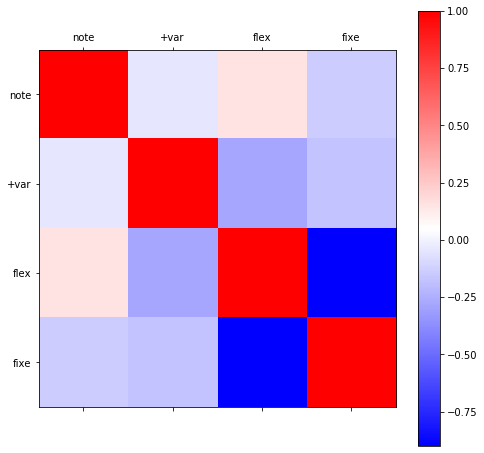

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

alpha = ['note', '+var', 'flex', 'fixe']

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(DF_fusion_note.corr(), cmap='bwr', interpolation='nearest')
fig.colorbar(cax)

ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)

plt.show()

## Utilisation de la bibliothèque scipy

In [30]:
from scipy import stats

notes = DF_fusion_note['note'].values
for i, horaire in zip([1,2,3],['+var', 'flex', 'fixe']):
    horaire_flexible = DF_fusion_note.iloc[: , [i]].values
    # .ravel() return a contiguous flattened array
    r, valeur_p = stats.pearsonr(notes.ravel(), horaire_flexible.ravel())
    print(horaire,'r:',r, ', valeur p:',valeur_p)

+var r: -0.044652142622459166 , valeur p: 0.5738175189524354
flex r: 0.15673167035237448 , valeur p: 0.04708947831740449
fixe r: -0.14067127799208326 , valeur p: 0.07509694872811744


### Nous observons une faible corrélation à 0.16 entre la note obtenue et un horaire de travail flexible (flex) avec des plages de temps réservées et quelques exceptions. Par contre on observe une effet quasi nul (-0.04) si l'horaire est très variable (+var) et un léger effet négatif (corrélation négative à -0.14) dans le cas d'un horaire strict (fixe).

In [31]:
DF_fusion_attestation = DF_fusion.drop(['etudiant_id','note'],axis=1)

In [32]:
DF_fusion_attestation.corr()

,attestation,+var,flex,fixe
attestation,1.000000,-0.105912,0.108207,-0.062862
+var,-0.105912,1.000000,-0.281511,-0.166993
flex,0.108207,-0.281511,1.000000,-0.899074
fixe,-0.062862,-0.166993,-0.899074,1.000000


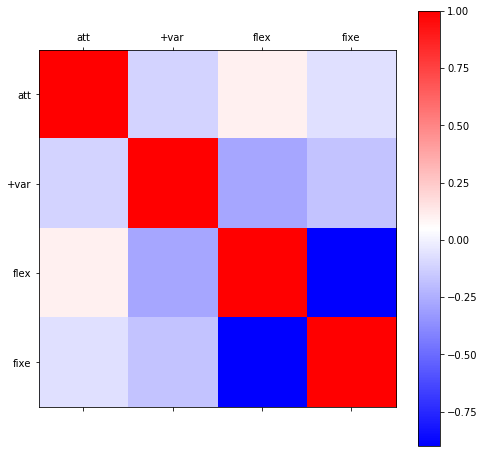

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

alpha = ['att', '+var', 'flex', 'fixe']

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(DF_fusion_attestation.corr(), cmap='bwr', interpolation='nearest')
fig.colorbar(cax)

ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)

plt.show()

## Utilisation de la bibliothèque scipy

In [34]:
from scipy import stats

notes = DF_fusion_attestation['attestation'].values
for i, horaire in zip([1,2,3],['+var', 'flex', 'fixe']):
    horaire_flexible = DF_fusion_attestation.iloc[: , [i]].values
    # .ravel() return a contiguous flattened array
    r, valeur_p = stats.pearsonr(notes.ravel(), horaire_flexible.ravel())
    print(horaire,'r:',r, ', valeur p:',valeur_p)

+var r: -0.10591226609886824 , valeur p: 0.18116751461877723
flex r: 0.10820716519580295 , valeur p: 0.171841021863228
fixe r: -0.06286185570937121 , valeur p: 0.42824614431914865


### Nous observons une faible corrélation à 0.11 entre l'obtention d'une attestation et un horaire de travail flexible avec des plages de temps réservées et quelques exceptions (flex). Par contre on observe un léger effet négatif (corrélation négative à -0.11) pour un horaire strict (fixe) et une effet presque nul (-0.06) si l'horaire est très variable (+var).

## Information mutuelle

L'information mutuelle révèle une association, que l'association soit linéaire (ce que mesure la corrélation) ou non, alors que la corrélation peut être nulle et que les variables peuvent encore être stochastiquement dépendantes.

In [35]:
# Code from: Entropy in machine learning - may 06 2019 - Francesco Gadaleta
# https://gist.github.com/rlangone/71d93b68d38a89c6722f414fc96f4792

# Import libraries
import pandas as pd
import numpy as np
from scipy.stats import iqr
from numpy import histogram2d
from sklearn.metrics import mutual_info_score

# Define mutual information function
def minfo(x, y):
    # Compute mutual information between x and y
    bins_x = max(2,int(2*iqr(x)*len(x)**-(1/3))) # use Freedman-Diaconis's Rule of thumb
    bins_y = max(2,int(2*iqr(y)*len(y)**-(1/3)))
    c_xy = histogram2d(x, y, [bins_x,bins_y])[0]
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi

# Build MI matrix
num_features = DF_fusion_attestation.shape[1]
MI_matrix = np.zeros((num_features,num_features))
for i,col_i in enumerate(DF_fusion_attestation):
    for j,col_j in enumerate(DF_fusion_attestation):
        MI_matrix[i,j] = minfo(DF_fusion_attestation[col_i],DF_fusion_attestation[col_j])
MI_df = pd.DataFrame(MI_matrix,columns = DF_fusion_attestation.columns, index = DF_fusion_attestation.columns)
print(MI_df)


             attestation      +var      flex      fixe
attestation     0.159159  0.003653  0.005712  0.001885
+var            0.003653  0.197600  0.047828  0.021927
flex            0.005712  0.047828  0.671991  0.496319
fixe            0.001885  0.021927  0.496319  0.646091


### L'information mutuelle révèle une plus forte association (0.005712) entre l'obtention d'une attestation et un horaire de travail flexible avec des plages de temps réservées et quelques exceptions. L'association est moindre (0.003653) si l'horaire est très variable (+var). L'association la plus faible (0.001885) est avec horaire strict (fixe).

# Conclusion

Pas vraiment très concluant! En fait, c'est souvent le cas avec des données réelles. C'est pourquoi les exercices académiques sont la plupart du temps réalisés avec des données synthétiques ou des jeux de données dit «académiques» de très bonne qualité.   


1) StackOverflow - https://stackoverflow.com

2) Pandas -https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html

3) Expressions régulières - http://regex101.com/ - https://www.regular-expressions.info/tutorial.html

4) Matplotlib - https://matplotlib.org/3.1.1/tutorials/index.html

5) Numpy et Scipy - https://docs.scipy.org/doc/numpy/user/quickstart.html